In [5]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten,BatchNormalization

from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:


seed = 16
filename = 'fer2013.csv'
label_map = ['Enfado', 'Asco', 'Miedo', 'Alegria', 'Tristeza', 'Sorpresa', 'Neutral']
names=['emocion','pixels','uso']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emocion,pixels,uso
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [7]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        #This condition skips the first condition
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X)/255.0 , np.array(Y)
    return X,Y

In [8]:
X,Y = getData("fer2013.csv")


In [9]:
N,D = X.shape
X=X.reshape(N, 48, 48, 1)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=16 )


In [45]:
# one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]


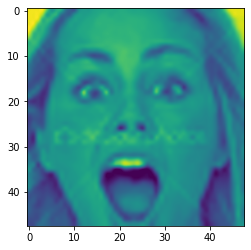

In [46]:
img = X_train[5754].reshape(48,48)
plt.imshow(img,interpolation = 'spline16')
plt.show()

In [77]:
model = Sequential()


In [78]:
model.add(Conv2D(48,(3,3),input_shape=X_train.shape[1:],padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [79]:
model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))

In [80]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [81]:
model.add(Conv2D(96, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [82]:
model.add(Flatten())
model.add(Dropout(0.2))

In [83]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [84]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [85]:
epochs = 20
optimizer = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [86]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 48)        480       
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 48)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 48, 48, 48)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 48, 48, 48)        192       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 48, 48, 96)        41568     
_________________________________________________________________
activation_25 (Activation)   (None, 48, 48, 96)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 96)       

In [87]:
np.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Train on 28709 samples, validate on 7178 samples
Epoch 1/20
28709/28709 [==============================] - 509s 18ms/step - loss: 1.7853 - accuracy: 0.3347 - val_loss: 1.5796 - val_accuracy: 0.3743
Epoch 2/20
28709/28709 [==============================] - 1596s 56ms/step - loss: 1.3871 - accuracy: 0.4695 - val_loss: 1.2979 - val_accuracy: 0.5057
Epoch 3/20
28709/28709 [==============================] - 519s 18ms/step - loss: 1.2397 - accuracy: 0.5266 - val_loss: 1.2072 - val_accuracy: 0.5463
Epoch 4/20
28709/28709 [==============================] - 500s 17ms/step - loss: 1.1477 - accuracy: 0.5657 - val_loss: 1.1918 - val_accuracy: 0.5559
Epoch 5/20
28709/28709 [==============================] - 500s 17ms/step - loss: 1.0959 - accuracy: 0.5850 - val_loss: 1.2584 - val_accuracy: 0.5337
Epoch 6/20
28709/28709 [==============================] - 499s 17ms/step - loss: 1.0642 - accuracy: 0.5979 - val_loss: 1.1209 - val_accuracy: 0.5793
Epoch 7/20
28709/28709 [==============================] 

In [90]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.32%
